In [ ]:
!pip -q install langchain huggingface_hub langchain-google-genai google-search-results tiktoken chromadb rank_bm25 faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 12.0 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [ ]:
!pip show langchain

Name: langchain
Version: 0.2.6
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 


# Hybrid Search

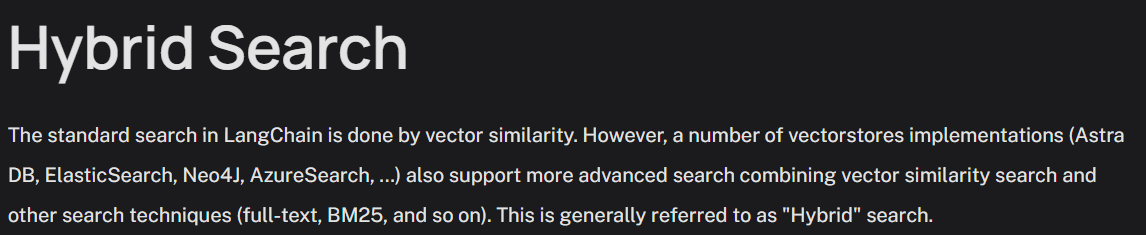

## BM25 Retriever - Sparse retriever

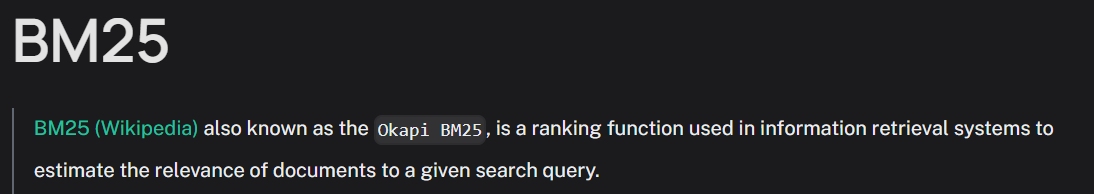

probabilistic retrieval framework

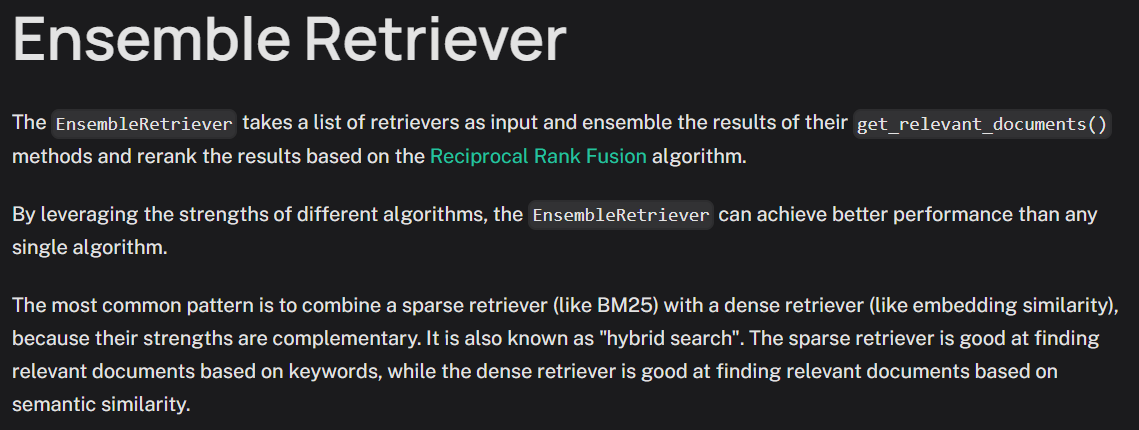

In [ ]:
!pip install -q langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever
from langchain.schema import Document

from langchain.vectorstores import Chroma
from langchain.vectorstores import FAISS

from langchain_google_genai import GoogleGenerativeAIEmbeddings
embedding = GoogleGenerativeAIEmbeddings(model="models/embedding-001")


In [ ]:
doc_list = [
    "I like apples",
    "I like oranges",
    "Apples and oranges are fruits",
    "I like computers by Apple",
    "I love fruit juice"
]

In [ ]:
# initialize the bm25 retriever and faiss retriever
bm25_retriever = BM25Retriever.from_texts(doc_list)
bm25_retriever.k = 2

In [ ]:
bm25_retriever.get_relevant_documents("Apple")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


[Document(page_content='I like computers by Apple'),
 Document(page_content='I love fruit juice')]

In [ ]:
bm25_retriever.get_relevant_documents("a green fruit")

[Document(page_content='I love fruit juice'),
 Document(page_content='I like computers by Apple')]

In [ ]:
bm25_retriever.dict

<bound method BaseModel.dict of BM25Retriever(vectorizer=<rank_bm25.BM25Okapi object at 0x7e75a8a4b7f0>, k=2)>

## Embeddings - Dense retrievers FAISS

In [ ]:
faiss_vectorstore = FAISS.from_texts(doc_list, embedding)
faiss_retriever = faiss_vectorstore.as_retriever(search_kwargs={"k": 2})

In [ ]:
faiss_retriever.get_relevant_documents("A green fruit")

[Document(page_content='Apples and oranges are fruits'),
 Document(page_content='I love fruit juice')]

## Ensemble Retriever

In [ ]:
# initialize the ensemble retriever
ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever, faiss_retriever],
                                       weights=[0.5, 0.5])

In [ ]:
docs = ensemble_retriever.get_relevant_documents("A green fruit")
docs

[Document(page_content='I love fruit juice'),
 Document(page_content='Apples and oranges are fruits'),
 Document(page_content='I like computers by Apple')]

In [ ]:
docs = ensemble_retriever.get_relevant_documents("Apple Phones")
docs

[Document(page_content='I like computers by Apple'),
 Document(page_content='I love fruit juice'),
 Document(page_content='I like apples')]